*Data Evaluation*

In [13]:
#!python -m pip install pandas
#!python -m pip install matplotlib
#!python -m pip install numpy

!cd ..; cd content; ls


LearningData  sample_data


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
csv_file_path = "LearningData/100Eps_Expert_rules_LearningData_2023-12-17_22-38.csv"
df = pd.read_csv(csv_file_path)
df_naive2 = pd.read_csv("/content/LearningData/100Eps_Naive_rules_LearningData_2023-12-18_13-30.csv")
df.head()

,Strategy 1,Strategy 2,Strategy 3,Strategy 4,Strategy 5,Strategy 6,Strategy 7,Action,Number of Alerts,Sum of alert weights,Reward,Done,Timestamp
0,False,False,False,False,False,False,False,0,7,22,-88,False,2023-12-17 22:39:25.848619
1,False,False,True,False,False,False,False,3,5,18,-73,False,2023-12-17 22:39:40.889535
2,False,False,True,True,False,False,False,4,4,16,-66,False,2023-12-17 22:39:55.932088
3,False,False,False,True,False,False,False,3,6,20,-81,False,2023-12-17 22:40:10.985482
4,False,False,False,False,False,False,False,4,7,22,-88,False,2023-12-17 22:40:26.030045


In [16]:
df['Episode'] = 1

current_episode = 1
for index, row in df.iterrows():
    if row['Done']:
        current_episode += 1
    df.at[index, 'Episode'] = current_episode

In [44]:
summary_df = df.groupby('Episode')['Number of Alerts'].sum().reset_index()
summary_df.columns = ['Episode', 'Number of Actions']

summary_df.tail()

,Episode,Number of Actions
95,96,47
96,97,15
97,98,15
98,99,16
99,100,0


In [18]:
df_naive2['Episode'] = 1

current_episode = 1
for index, row in df_naive2.iterrows():
    if row['Done']:
        current_episode += 1
    df_naive2.at[index, 'Episode'] = current_episode

summary_df_naive2 = df_naive2.groupby('Episode')['Number of Alerts'].sum().reset_index()
summary_df_naive2.columns = ['Episode', 'Number of Actions']

summary_df_naive2

,Episode,Number of Actions
0,1,48
1,2,0
2,3,2
3,4,2
4,5,0
...,...,...
96,97,2
97,98,2
98,99,3
99,100,3


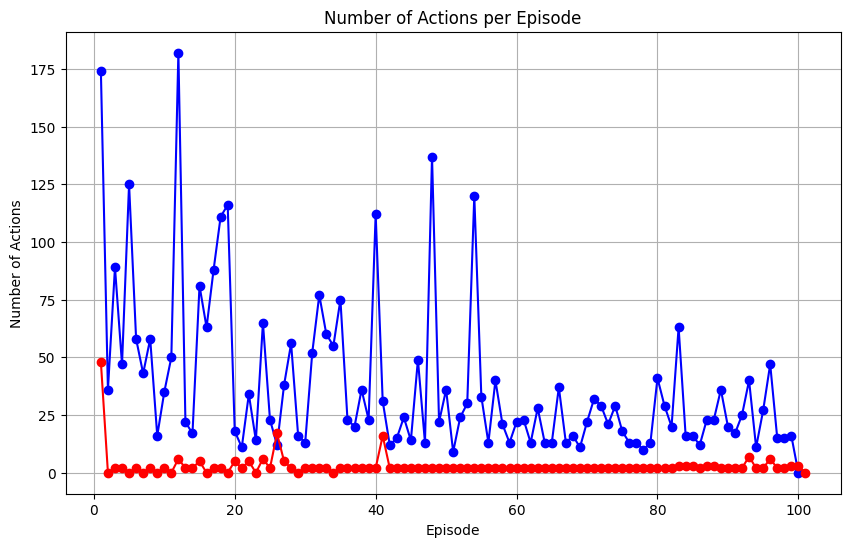

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Episode'], summary_df['Number of Actions'], marker='o', linestyle='-', color='blue')
plt.plot(summary_df_naive2['Episode'], summary_df_naive2['Number of Actions'], marker='o', linestyle='-', color='red')

plt.title('Number of Actions per Episode')
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.grid(True)
plt.show()

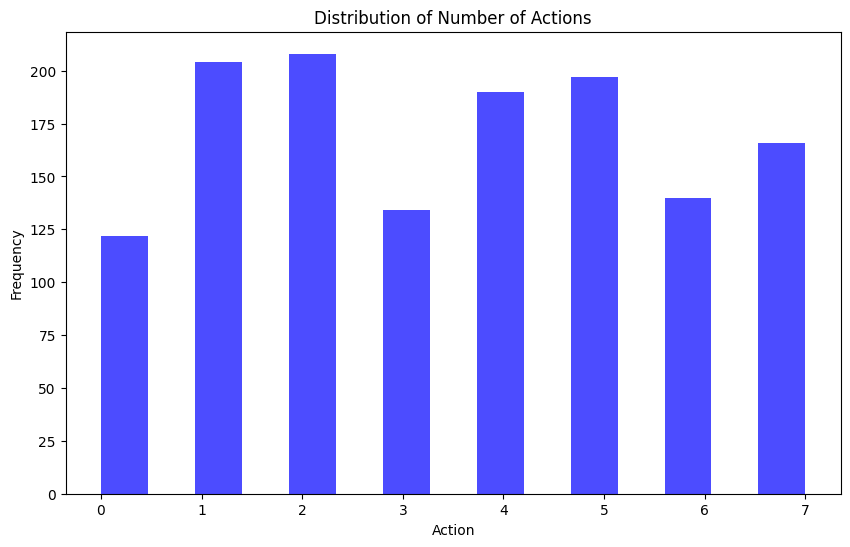

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Action'], bins=15, color='blue', alpha=0.7)
#plt.hist(df_naive2['Action'], bins=15, color='red', alpha=0.7)
plt.title('Distribution of Number of Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.show()

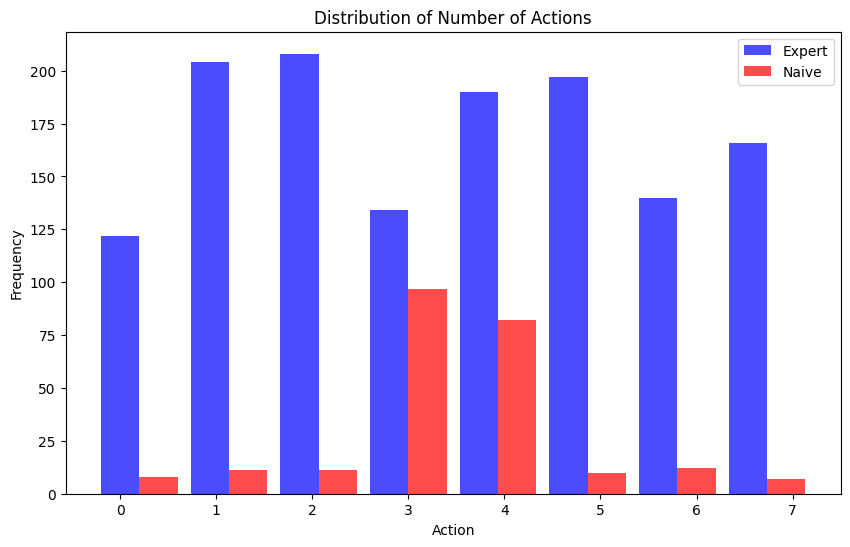

In [21]:
import numpy as np
import matplotlib.pyplot as plt

hist_data, bin_edges = np.histogram(df['Action'], bins=15)
hist_data_naive2, bin_edges_naive2 = np.histogram(df_naive2['Action'], bins=15)

width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(bin_edges[:-1], hist_data, width=width, color='blue', alpha=0.7, label='Expert')
plt.bar(bin_edges_naive2[:-1] + width, hist_data_naive2, width=width, color='red', alpha=0.7, label='Naive')

plt.title('Distribution of Number of Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.legend()
plt.show()


NameError: name 'data' is not defined

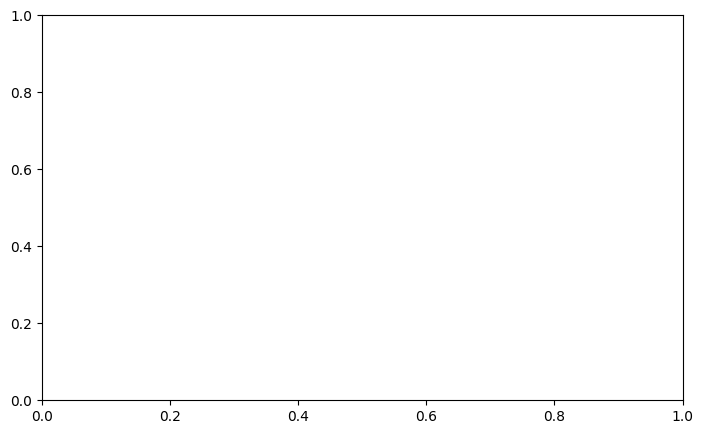

In [22]:
import numpy as np

naive2_actions = df_naive2['Action']
naive2_bar_height, naive2_bar_edges = np.histogram(naive2_actions, bins=15)

colors = {'Expert': 'blue', 'Naive': 'red', 'Naive2': 'red'}

fig, ax1 = plt.subplots(figsize=(8.27, 5))  # A4 size

# Plotting the first bar plot
ax1.bar(data.keys(), data.values(), width=0.4, color=[colors[model] for model in data.keys()])
ax1.set_xlabel('Model')
ax1.set_ylabel('Training (in hours)')
ax1.set_title('Training Hours Difference')
ax1.grid(axis='y')

# Creating a second y-axis for the histogram
ax2 = ax1.twinx()
ax2.hist(df['Action'], bins=15, color='blue', alpha=0.7)
ax2.set_ylabel('Frequency')

# Adjust layout
fig.tight_layout(pad=1.0)
plt.show()


In [23]:
df['Episode Group'] = (df['Episode'] // 10) * 10

episode_group_actions_df = pd.crosstab(df['Episode Group'], df['Action'])

print(episode_group_actions_df)

Action          0   1   2   3   4   5   6   7
Episode Group                                
0              23  41  24  28  29  34  27  27
10             30  37  37  29  40  32  26  36
20              8  15  26  11  20   9  10  14
30             17  24  31  16  18  18  14  18
40             20  15  24  21  14  16  17  20
50             10  22  18   8  14  22  16  12
60              4  10  12   4  10  15  10   9
70              2  10  12   2  14  18   6  10
80              7  14  14   9  19  13   7  12
90              1  16   9   6  12  20   7   8
100             0   0   1   0   0   0   0   0


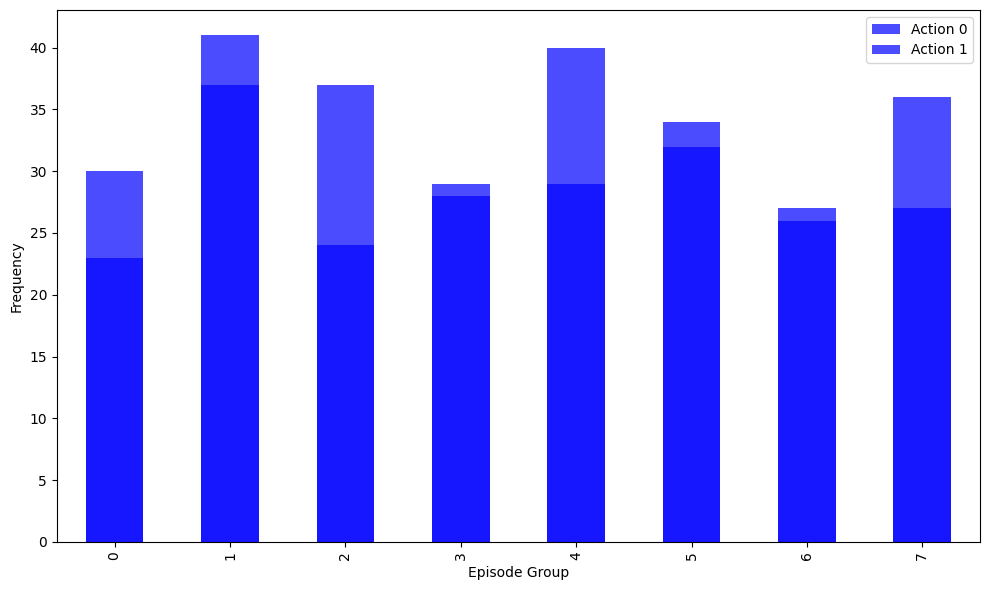

In [24]:
first_two_episode_groups = episode_group_actions_df.index[:2]
plt.figure(figsize=(10, 6))


for i, episode_group in enumerate(first_two_episode_groups):
    episode_group_actions_df.loc[episode_group].plot(kind='bar', color='blue', alpha=0.7)

plt.legend(['Action 0', 'Action 1', 'Action 2', 'Action 3', 'Action 4', 'Action 5', 'Action 6', 'Action 7'])
plt.xlabel('Episode Group')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

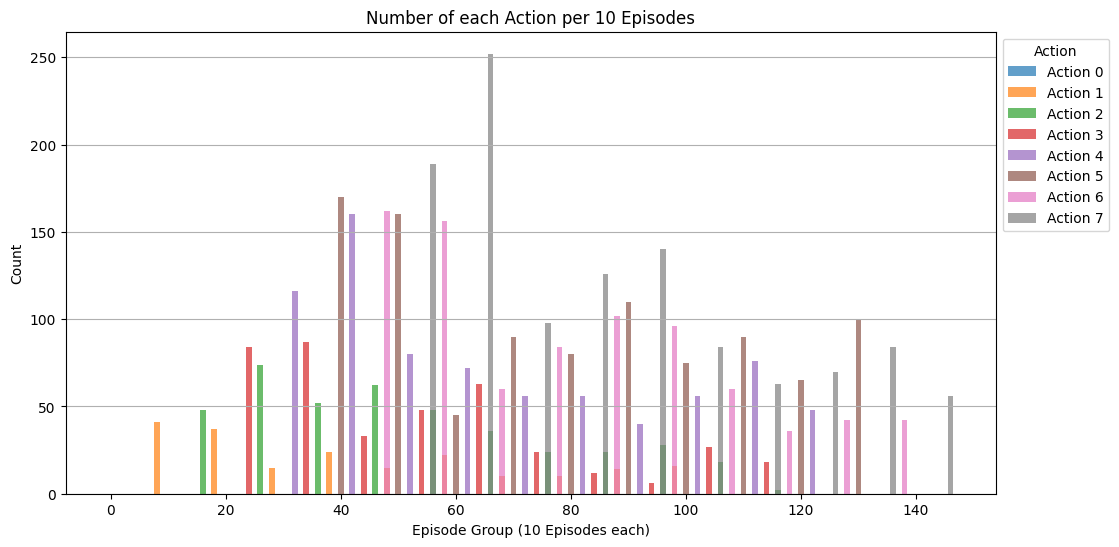

In [25]:
df['Episode Group'] = (df['Episode'] // 10) * 10

# Create a new DataFrame with Episode Group and Action columns
grouped_df = df.groupby(['Episode Group', 'Action'])['Action'].sum().unstack().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 1

for i, col in enumerate(grouped_df.columns[1:]):
    x = grouped_df['Episode Group'] + i * bar_width * (len(grouped_df.columns)-1)
    plt.bar(x, grouped_df[col], width=bar_width, label=f'Action {col}', alpha=0.7)

plt.title('Number of each Action per 10 Episodes')
plt.xlabel('Episode Group (10 Episodes each)')
plt.ylabel('Count')
plt.legend(title='Action', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [26]:
grouped_df

Action,Episode Group,0,1,2,3,4,5,6,7
0,0,0.0,41.0,48.0,84.0,116.0,170.0,162.0,189.0
1,10,0.0,37.0,74.0,87.0,160.0,160.0,156.0,252.0
2,20,0.0,15.0,52.0,33.0,80.0,45.0,60.0,98.0
3,30,0.0,24.0,62.0,48.0,72.0,90.0,84.0,126.0
4,40,0.0,15.0,48.0,63.0,56.0,80.0,102.0,140.0
5,50,0.0,22.0,36.0,24.0,56.0,110.0,96.0,84.0
6,60,0.0,10.0,24.0,12.0,40.0,75.0,60.0,63.0
7,70,0.0,10.0,24.0,6.0,56.0,90.0,36.0,70.0
8,80,0.0,14.0,28.0,27.0,76.0,65.0,42.0,84.0
9,90,0.0,16.0,18.0,18.0,48.0,100.0,42.0,56.0


# New code


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
csv_file_path_expert = "LearningData/100Eps_Expert_rules_LearningData_2023-12-17_22-38.csv"
csv_file_path_naive = "/content/LearningData/100Eps_Naive_rules_LearningData_2023-12-18_13-30.csv"
df_expert = pd.read_csv(csv_file_path_expert)
df_naive = pd.read_csv(csv_file_path_naive)
# True True (in Done)
df_naive.drop(22, inplace=True)

print(f'Len naive: {len(df_naive[df_naive["Done"] == True].index.tolist())}')
print(f'Len expert: {len(df_expert[df_expert["Done"] == True].index.tolist())}')

Len naive: 99
Len expert: 99


In [29]:
def episode_idx(df):
  episodes = df[df['Done'] == True].index.tolist()
  episodes.insert(0,0)
  return [(episodes[i-1], episodes[i]) for i in range(1, len(episodes))]


expert_eps_idx = episode_idx(df_expert)
naive_eps_idx = episode_idx(df_naive)
print(len(episode_idx(df_naive)))
print(len(episode_idx(df_expert)))
episode_idx(df_expert)[-1]

99
99


(1354, 1360)

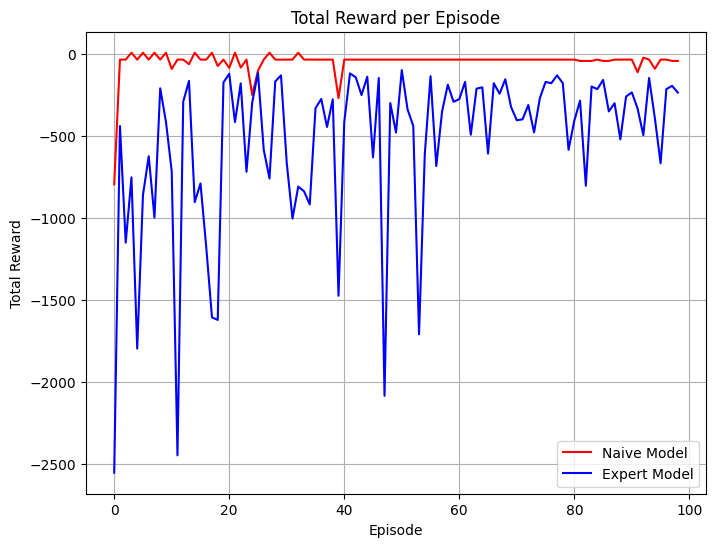

In [30]:
def calculate_rewards(df, eps_idx):
  return [df['Reward'].iloc[idx[0]:idx[1]].sum() for idx in eps_idx]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(calculate_rewards(df_naive, naive_eps_idx), color='red', label='Naive Model')
ax.plot(calculate_rewards(df_expert, expert_eps_idx), color='blue', label='Expert Model')

ax.set_xlabel('Episode')
ax.set_ylabel('Total Reward')
ax.set_title('Total Reward per Episode')
ax.legend()
ax.grid(True)

plt.show()



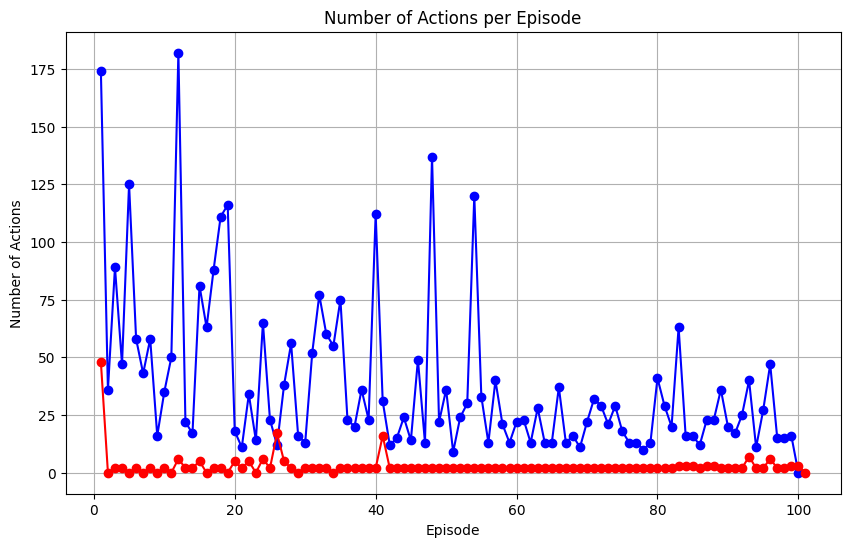

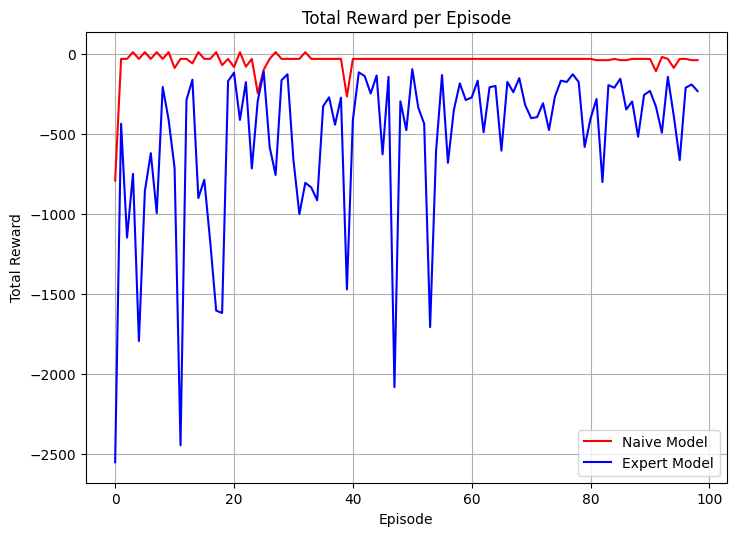

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# First Plot
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Episode'], summary_df['Number of Actions'], marker='o', linestyle='-', color='blue')
plt.plot(summary_df_naive2['Episode'], summary_df_naive2['Number of Actions'], marker='o', linestyle='-', color='red')
plt.title('Number of Actions per Episode')
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.grid(True)

# Second Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(calculate_rewards(df_naive, naive_eps_idx), color='red', label='Naive Model')
ax.plot(calculate_rewards(df_expert, expert_eps_idx), color='blue', label='Expert Model')
ax.set_xlabel('Episode')
ax.set_ylabel('Total Reward')
ax.set_title('Total Reward per Episode')
ax.legend()
ax.grid(True)

# Arrange Plots Side by Side
fig.tight_layout(pad=3.0)
plt.show()


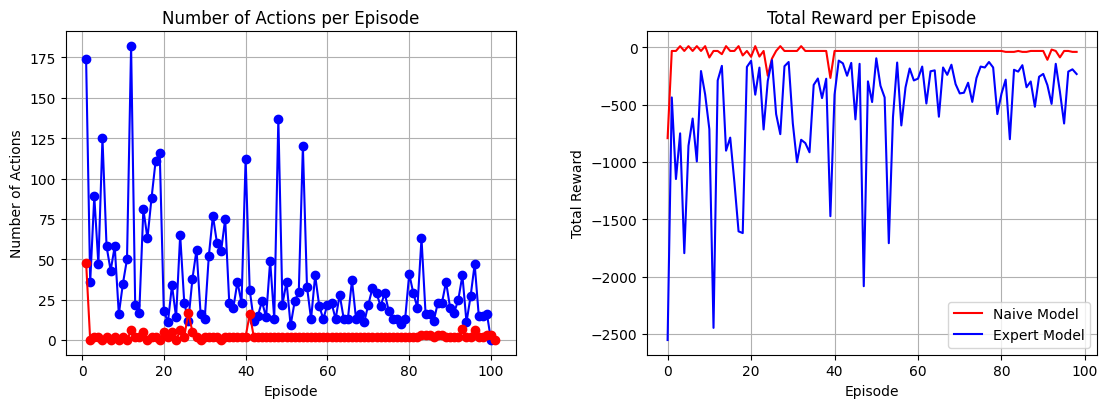

In [32]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 1x2 grid
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1])

# First Plot
ax0 = plt.subplot(gs[0])
ax0.plot(summary_df['Episode'], summary_df['Number of Actions'], marker='o', linestyle='-', color='blue')
ax0.plot(summary_df_naive2['Episode'], summary_df_naive2['Number of Actions'], marker='o', linestyle='-', color='red')
ax0.set_title('Number of Actions per Episode')
ax0.set_xlabel('Episode')
ax0.set_ylabel('Number of Actions')
ax0.grid(True)

# Second Plot
ax1 = plt.subplot(gs[1])
ax1.plot(calculate_rewards(df_naive, naive_eps_idx), color='red', label='Naive Model')
ax1.plot(calculate_rewards(df_expert, expert_eps_idx), color='blue', label='Expert Model')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Total Reward per Episode')
ax1.legend()
ax1.grid(True)

# Adjust layout
fig.tight_layout(pad=4.0)
plt.show()


In [33]:
selected_columns = ['Strategy 1', 'Strategy 2', 'Strategy 3', 'Strategy 4', 'Strategy 5', 'Strategy 6', 'Strategy 7']


def strategy_counts(df, eps_idx):
    counts = []
    for idx in eps_idx:
        strategies = df[selected_columns].iloc[idx[0]:idx[1]].sum()
        strategy_0_count = (df['Action'].iloc[idx[0]:idx[1]] == 0).sum()
        counts.append(pd.concat([strategies, pd.Series({'Strategy 0': strategy_0_count})]))
    return counts


expert_counts = strategy_counts(df_expert, expert_eps_idx)
naive_counts = strategy_counts(df_naive, naive_eps_idx)

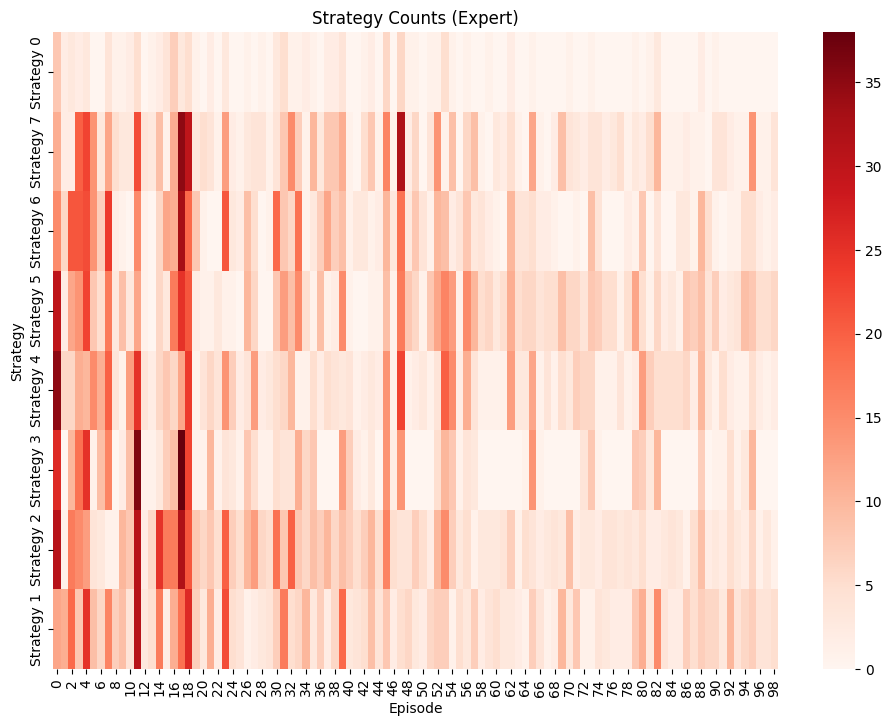

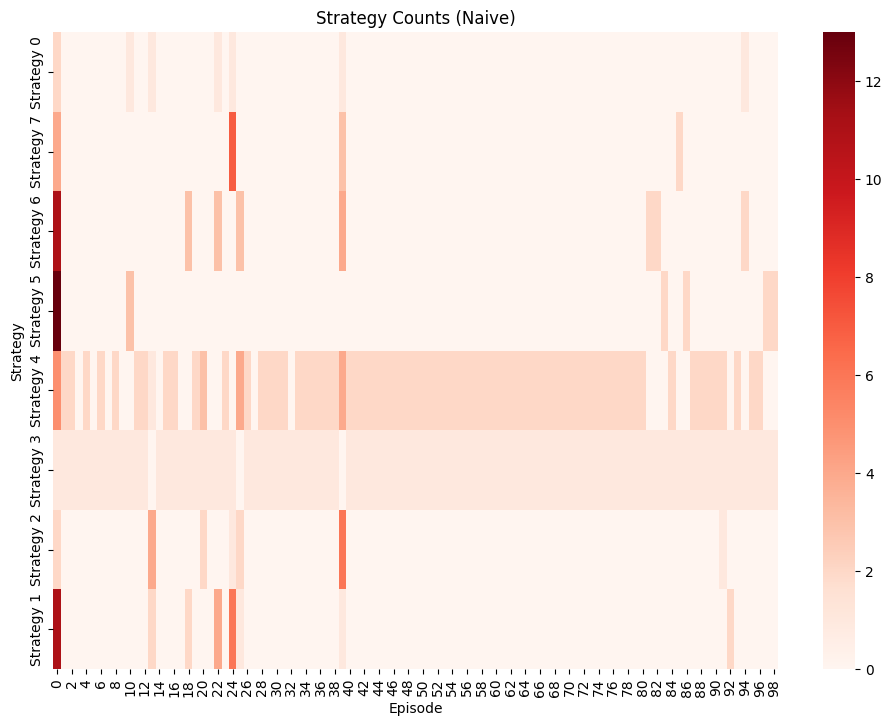

In [34]:
def plot_strategy_counts(counts, title):
    df = pd.concat(counts, axis=1).T.fillna(0)

    plt.figure(figsize=(11.69, 8.27))
    ax = sns.heatmap(df.T, cmap='Reds')

    ax.set_title(f'Strategy Counts ({title})')
    ax.set_ylabel('Strategy')
    ax.set_xlabel('Episode')

    ax.invert_yaxis()

plot_strategy_counts(expert_counts, 'Expert')
plot_strategy_counts(naive_counts, 'Naive')


In [41]:
def strategy_group_counts(counts, group_size=20):
  grouped_and_summed = []
  for i in range(0, len(counts), group_size):
      grouped_sum = pd.concat(counts[i:i+group_size], axis=1).sum(axis=1)
      grouped_and_summed.append(grouped_sum)
  return grouped_and_summed

def normalize_counts(counts):
    df = pd.concat(counts, axis=1).T.fillna(0)
    return df.div(df.sum(axis=1), axis=0)

expert_counts_grouped = normalize_counts(strategy_group_counts(expert_counts))
naive_counts_grouped = normalize_counts(strategy_group_counts(naive_counts))
print(expert_counts_grouped)
print(naive_counts_grouped)
#print(pd.concat(expert_counts_20, axis=1).T.fillna(0))

   Strategy 1  Strategy 2  Strategy 3  Strategy 4  Strategy 5  Strategy 6  \
0    0.145994    0.156083    0.139466    0.130564    0.126409    0.141246   
1    0.156885    0.209932    0.097065    0.113995    0.113995    0.148984   
2    0.119384    0.159178    0.094994    0.147625    0.168164    0.127086   
3    0.145749    0.147773    0.074899    0.153846    0.238866    0.093117   
4    0.216797    0.121094    0.093750    0.158203    0.185547    0.101562   

   Strategy 7  Strategy 0  
0    0.128190    0.032047  
1    0.127540    0.031603  
2    0.148909    0.034660  
3    0.133603    0.012146  
4    0.109375    0.013672  
   Strategy 1  Strategy 2  Strategy 3  Strategy 4  Strategy 5  Strategy 6  \
0    0.144231    0.057692    0.182692    0.250000    0.153846    0.134615   
1    0.121212    0.111111    0.181818    0.353535    0.000000    0.101010   
2    0.000000    0.000000    0.333333    0.666667    0.000000    0.000000   
3    0.000000    0.000000    0.333333    0.666667    0.000000

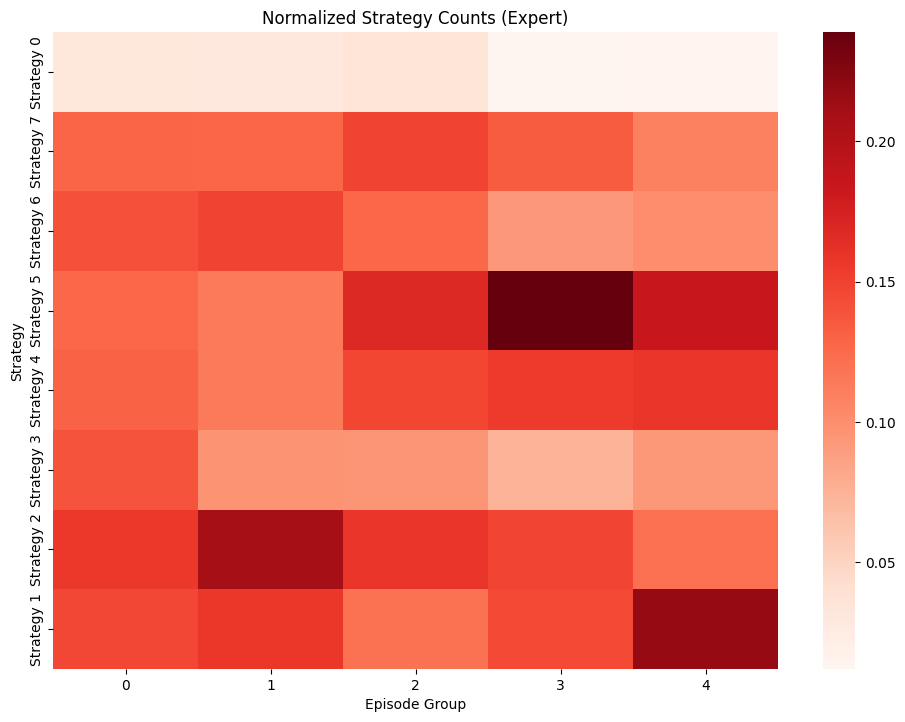

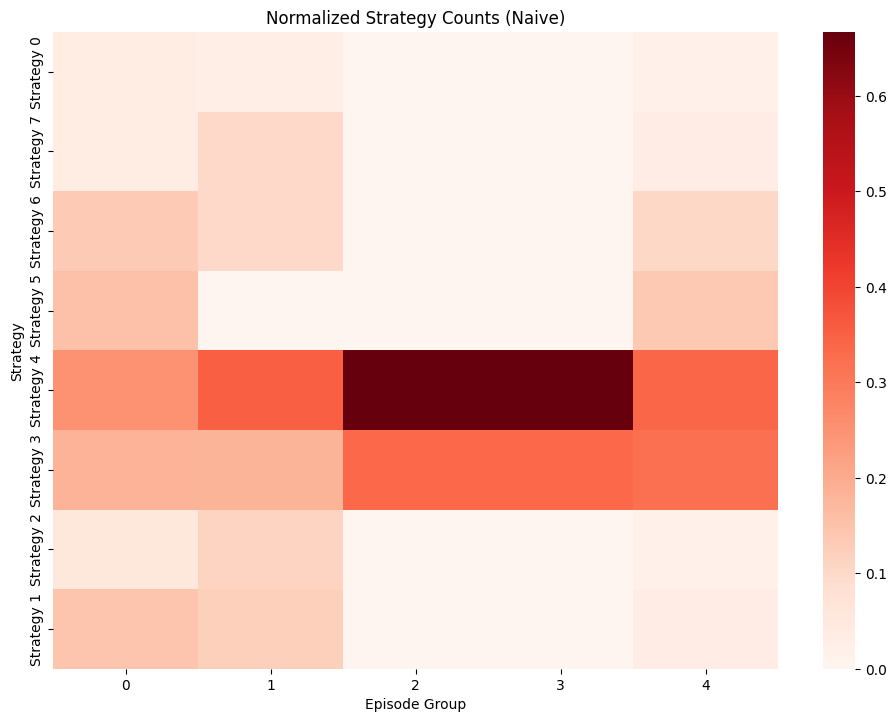

In [38]:
def plot_normalized_strategy_counts(counts, title):
    plt.figure(figsize=(11.69, 8.27))
    ax = sns.heatmap(counts.T, cmap='Reds')  # Transpose the DataFrame

    ax.set_title(f'Normalized Strategy Counts ({title})')
    ax.set_ylabel('Strategy')  # Swap x and y labels
    ax.set_xlabel('Episode Group')

    ax.invert_yaxis()

plot_normalized_strategy_counts(expert_counts_grouped, 'Expert')
plot_normalized_strategy_counts(naive_counts_grouped, 'Naive')


In [39]:
df_expert['Timestamp'].iloc[-1]

'2023-12-18 04:20:48.251520'

In [46]:
df.head()

,Strategy 1,Strategy 2,Strategy 3,Strategy 4,Strategy 5,Strategy 6,Strategy 7,Action,Number of Alerts,Sum of alert weights,Reward,Done,Timestamp,Episode,Episode Group
0,False,False,False,False,False,False,False,0,7,22,-88,False,2023-12-17 22:39:25.848619,1,0
1,False,False,True,False,False,False,False,3,5,18,-73,False,2023-12-17 22:39:40.889535,1,0
2,False,False,True,True,False,False,False,4,4,16,-66,False,2023-12-17 22:39:55.932088,1,0
3,False,False,False,True,False,False,False,3,6,20,-81,False,2023-12-17 22:40:10.985482,1,0
4,False,False,False,False,False,False,False,4,7,22,-88,False,2023-12-17 22:40:26.030045,1,0


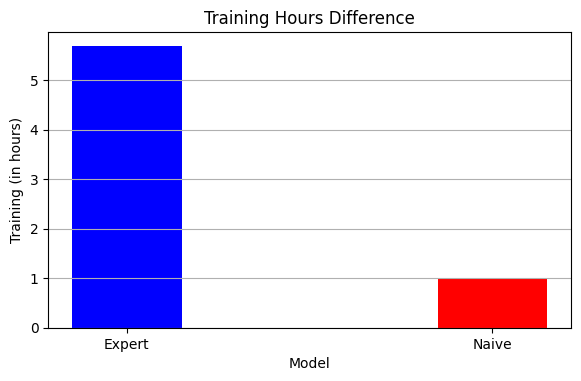

In [62]:
import datetime
hours_difference_expert = (datetime.datetime.strptime(df_expert['Timestamp'].iloc[-1], '%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(df_expert['Timestamp'][0], '%Y-%m-%d %H:%M:%S.%f')).total_seconds() / 3600
hours_difference_naive = (datetime.datetime.strptime(df_naive['Timestamp'].iloc[-1], '%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(df_naive['Timestamp'][0], '%Y-%m-%d %H:%M:%S.%f')).total_seconds() / 3600


data = {'Expert': hours_difference_expert, 'Naive': hours_difference_naive}
colors = {'Expert': 'blue', 'Naive': 'red'}

plt.figure(figsize=(7, 5))
plt.bar(data.keys(), data.values(), width=0.3, color=[colors[model] for model in data.keys()])
plt.xlabel('Model')
plt.ylabel('Training (in hours)')
plt.title('Training Hours Difference')
plt.grid(axis='y')
plt.tight_layout(pad=5.0)
plt.show()



In [54]:
df.head()


,Strategy 1,Strategy 2,Strategy 3,Strategy 4,Strategy 5,Strategy 6,Strategy 7,Action,Number of Alerts,Sum of alert weights,Reward,Done,Timestamp,Episode,Episode Group
0,False,False,False,False,False,False,False,0,7,22,-88,False,2023-12-17 22:39:25.848619,1,0
1,False,False,True,False,False,False,False,3,5,18,-73,False,2023-12-17 22:39:40.889535,1,0
2,False,False,True,True,False,False,False,4,4,16,-66,False,2023-12-17 22:39:55.932088,1,0
3,False,False,False,True,False,False,False,3,6,20,-81,False,2023-12-17 22:40:10.985482,1,0
4,False,False,False,False,False,False,False,4,7,22,-88,False,2023-12-17 22:40:26.030045,1,0


In [53]:
df_naive2.tail()


,Strategy 1,Strategy 2,Strategy 3,Strategy 4,Strategy 5,Strategy 6,Strategy 7,Action,Number of Alerts,Sum of alert weights,Reward,Done,Timestamp,Episode
233,False,False,True,True,False,False,False,3,0,0,8,True,2023-12-18 14:29:06.943781,99
234,False,False,False,False,True,False,False,5,3,12,-49,False,2023-12-18 14:29:22.004266,99
235,False,False,True,False,True,False,False,3,0,0,8,True,2023-12-18 14:29:37.060694,100
236,False,False,False,False,True,False,False,5,3,12,-49,False,2023-12-18 14:29:52.125406,100
237,False,False,True,False,True,False,False,3,0,0,8,True,2023-12-18 14:30:07.180344,101


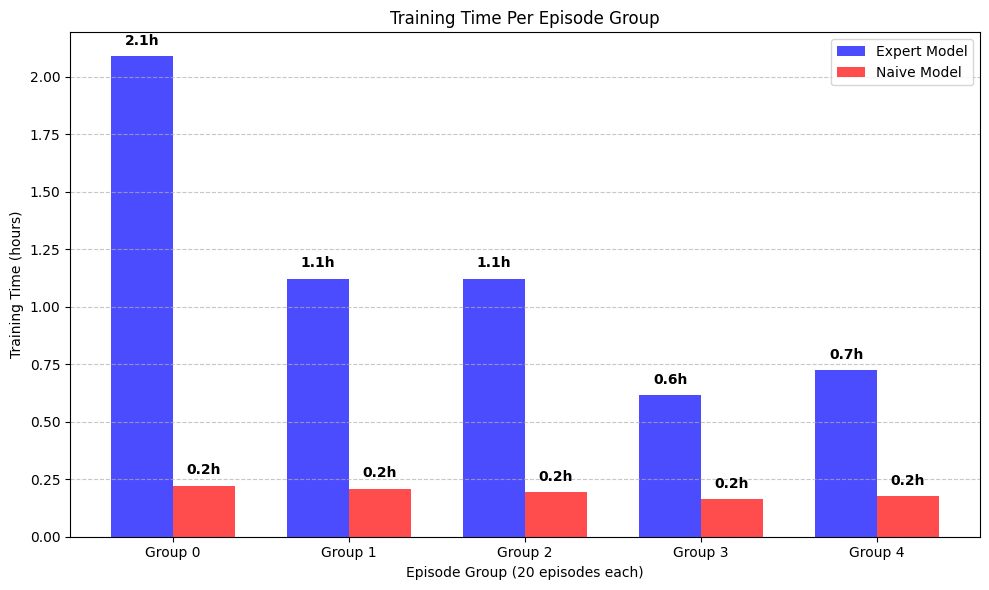

In [57]:
# Calculate time per episode group for expert model
expert_group_times = []
group_size = 20
for i in range(0, 100, group_size):  # Assuming 100 episodes total
    group_end = min(i + group_size - 1, 99)
    # Filter rows for episodes in this group
    group_data = df[df['Episode'].between(i, group_end)]
    if not group_data.empty:
        start_time = datetime.datetime.strptime(group_data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S.%f')
        end_time = datetime.datetime.strptime(group_data['Timestamp'].iloc[-1], '%Y-%m-%d %H:%M:%S.%f')
        group_time = (end_time - start_time).total_seconds() / 3600
        expert_group_times.append(group_time)
    else:
        expert_group_times.append(0)  # Handle empty groups

# Calculate time per episode group for naive model
naive_group_times = []
for i in range(0, 100, group_size):
    group_end = min(i + group_size - 1, 99)
    # Filter rows for episodes in this group
    group_data = df_naive2[df_naive2['Episode'].between(i, group_end)]
    if not group_data.empty:
        start_time = datetime.datetime.strptime(group_data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S.%f')
        end_time = datetime.datetime.strptime(group_data['Timestamp'].iloc[-1], '%Y-%m-%d %H:%M:%S.%f')
        group_time = (end_time - start_time).total_seconds() / 3600
        naive_group_times.append(group_time)
    else:
        naive_group_times.append(0)  # Handle empty groups
# Plot training time per episode group
plt.figure(figsize=(10, 6))
x = np.arange(len(expert_group_times))  # Group numbers
width = 0.35  # Width of bars

plt.bar(x - width/2, expert_group_times, width, label='Expert Model', color='blue', alpha=0.7)
plt.bar(x + width/2, naive_group_times, width, label='Naive Model', color='red', alpha=0.7)

plt.xlabel('Episode Group (20 episodes each)')
plt.ylabel('Training Time (hours)')
plt.title('Training Time Per Episode Group')
plt.xticks(x, [f'Group {i}' for i in range(len(expert_group_times))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(expert_group_times):
    plt.text(i - width/2, v + 0.05, f'{v:.1f}h', ha='center', fontweight='bold')

for i, v in enumerate(naive_group_times):
    plt.text(i + width/2, v + 0.05, f'{v:.1f}h', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('training_time_per_group.png', dpi=300)
plt.show()